In [54]:
import os
import numpy as np
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter (ΩM)
Ode0 = 0.7  # Dark energy density parameter (ΩΛ)

# Create a FlatLambdaCDM cosmology object
cosmo1 = FlatLambdaCDM(H0=H0, Om0=Om0)  


# Define the directory path where the txt files are located
directory_path = 'model_data'

# Create an empty dictionary to hold the data from all txt files
data_dict = {}

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a txt file
    if filename.endswith('.txt'):
        # Read the data from the file using numpy.loadtxt()
        file_path = os.path.join(directory_path, filename)
        data = np.loadtxt(file_path)
        
        # Create a pandas DataFrame to hold the data
        df = pd.DataFrame(data, columns=['Z_list', 'L_x', 'em_tot', 'avg_tot', 'n_tot', 'integral_results_z_tot'])
        
        # Add the DataFrame to the dictionary with the filename as the key
        data_dict[filename] = df

# Access the data for a specific file using the filename as the key
data = data_dict['AMPLE_Blazar.txt']
#print(data["integral_results_z_tot"])


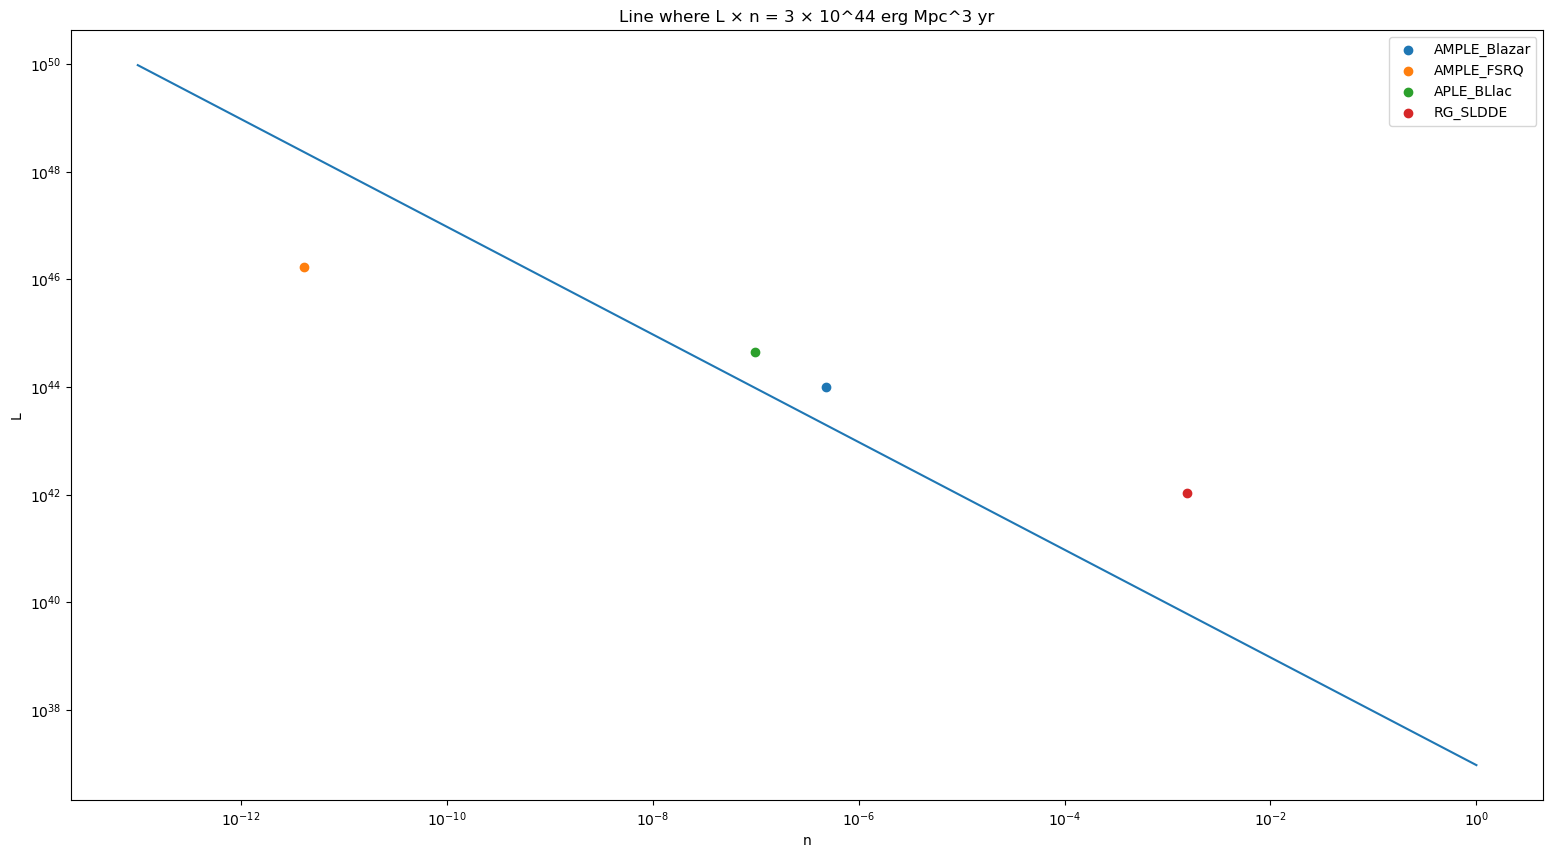

In [70]:

diffuse_flux_UHECR = 6*10**(17) #ev





# Define the value of n
n_values = np.logspace(-13, 0, 1000)

# Calculate the corresponding values of L
L_values = (3 * 10**44) / n_values/(60*60*24*365)

# Plot the line
plt.figure(1, figsize=(19,10))
plt.plot(n_values, L_values)
for filename, df in data_dict.items():
    # Extract the required data, z = 0.01
    n_z_tot = df['n_tot'][0]
    avg_tot = df['avg_tot'][0]
    
   
    plt.scatter(n_z_tot, avg_tot, label=filename[:-4])


plt.xlabel('n')
plt.yscale('log',base=10)
plt.xscale('log',base=10)
plt.ylabel('L')
plt.title('Line where L × n = 3 × 10^44 erg Mpc^3 yr')
plt.legend()
# Show the plot
plt.show()




In [2]:
import os
import pandas as pd

# Define the directory path where the txt files are located
directory_path = 'lum_den_data'

# Create an empty dictionary to hold the data from all txt files
data_dict_lum_den = {}

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a txt file
    if filename.endswith('.txt'):
        # Read the data from the file using pandas.read_csv()
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep=',')
        
        # Add the DataFrame to the dictionary with the filename as the key
        data_dict_lum_den[filename] = df

# Access the data for a specific file using the filename as the key
data = data_dict_lum_den['LD_APLE_BLlac.txt']
print(data.head())


   #  0.01<z<2.5    2.51<z<5.0    5.01<z<7.5   7.51<z<10.0           L_x  \
0   5.816312e-42  2.059705e-42  6.334825e-43  2.600780e-43  3.162278e+44   
1   3.561119e-42  1.261083e-42  3.878586e-43  1.592364e-43  3.816213e+44   
2   2.180345e-42  7.721159e-43  2.374719e-43  9.749472e-44  4.605378e+44   
3   1.334947e-42  4.727388e-43  1.453955e-43  5.969252e-44  5.557737e+44   
4   8.173400e-43  2.894410e-43  8.902044e-44  3.654758e-44  6.707036e+44   

     Z_list  
0  0.010000  
1  0.193469  
2  0.376939  
3  0.560408  
4  0.743878  


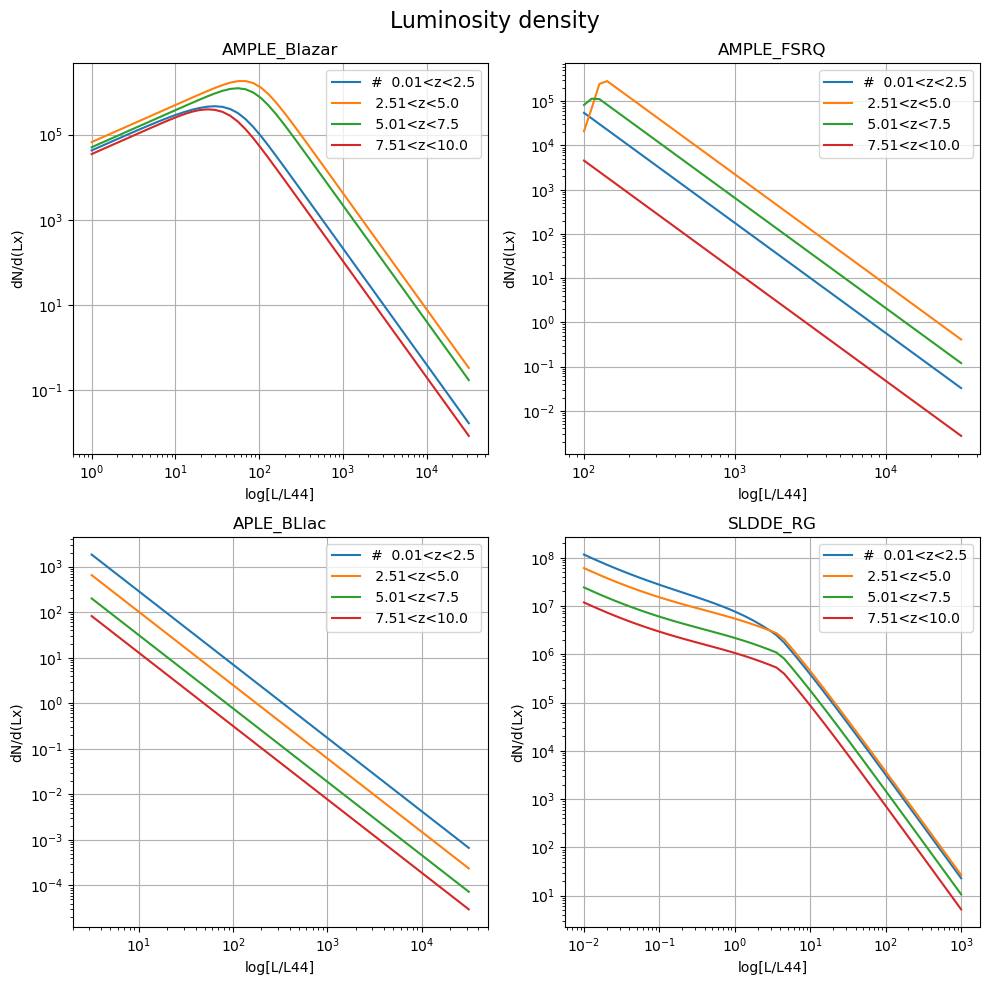

In [4]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()  

for i, (filename, df) in enumerate(data_dict_lum_den.items()):
  
    for col in df.columns[:4]:
        axs[i].plot(df[df.columns[4]]/(10.0**(44)), df[df.columns[4]] * df[col], label=col)
    
 
    axs[i].set_title(filename[3:-4])
    axs[i].set_xlabel('log[L/L44]')
    axs[i].set_ylabel('dN/d(Lx)')
    axs[i].set_xscale('log', base=10)
    axs[i].set_yscale('log', base=10)
    axs[i].grid()
    axs[i].legend()
fig.suptitle('Luminosity density', fontsize=16)


plt.tight_layout()
plt.savefig('Luminosirt density.png')

# Show the plot
plt.show()


In [79]:
directory_path = 'red_den_data'

# Create an empty dictionary to hold the data from all txt files
data_dict_red_den = {}

# Loop through all files in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a txt file
    if filename.endswith('.txt'):
        # Read the data from the file using pandas.read_csv()
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path, sep=',')
        
        # Add the DataFrame to the dictionary with the filename as the key
        data_dict_red_den[filename] = df

# Access the data for a specific file using the filename as the key
data = data_dict_red_den['RD_APLE_BLlac.txt']
print(data.head())

   # 44.5<log(Lx)<45.5   45.5<log(Lx)<46.5   47.5<log(Lx)<48.5  \
0             0.755093            0.018535            0.000011   
1           167.629853            4.114825            0.002479   
2           389.566754            9.562730            0.005762   
3           541.840441           13.300606            0.008014   
4           616.316835           15.128784            0.009116   

    44.5<log(Lx)<48.5           L_x    Z_list  
0            1.541429  3.162278e+44  0.010000  
1          342.195602  3.816213e+44  0.193469  
2          795.252325  4.605378e+44  0.376939  
3         1106.100215  5.557737e+44  0.560408  
4         1258.134558  6.707036e+44  0.743878  


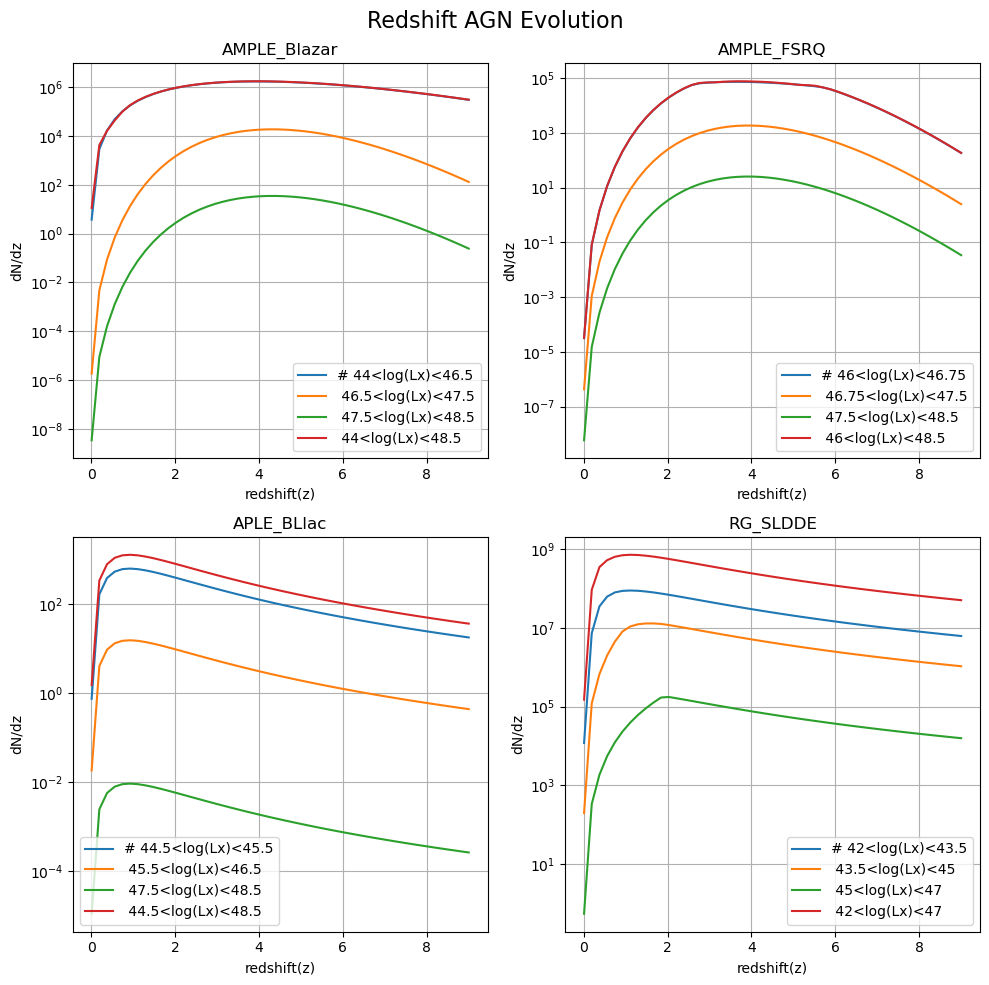

In [80]:

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()  


for i, (filename, df) in enumerate(data_dict_red_den.items()):
    
    for col in df.columns[:4]:
        axs[i].plot(df[df.columns[5]],  df[col], label=col)
    
    axs[i].set_title(filename[3:-4])
    axs[i].set_xlabel('redshift(z)')
    axs[i].set_ylabel('dN/dz')
    #axs[i].set_xscale('log', base=10)
    axs[i].set_yscale('log', base=10)
    axs[i].grid()
    axs[i].legend()

fig.suptitle('Redshift AGN Evolution', fontsize=16)
plt.savefig('Redshift AGN Evolution.png')

plt.tight_layout()

# Show the plot
plt.show()

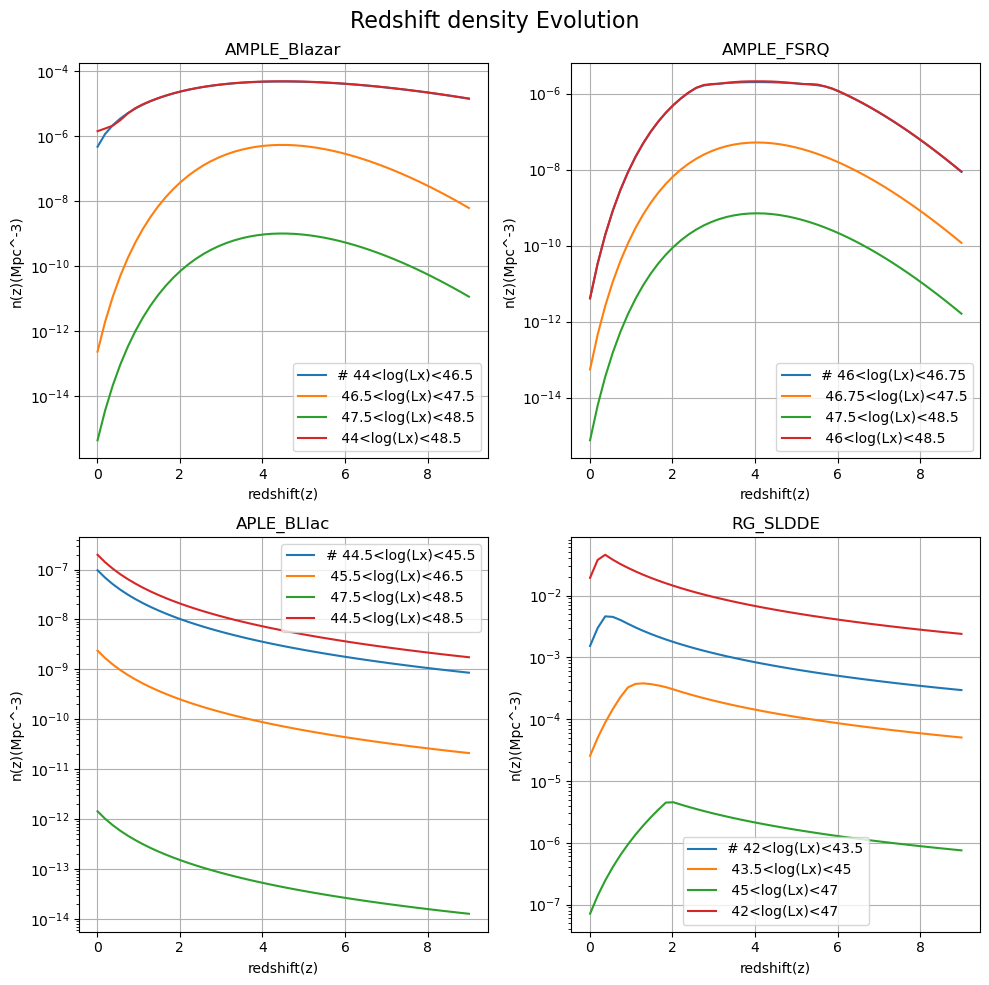

In [81]:
# Create a subplot for each DataFrame
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()  # Flatten the axs array to access each subplot individually

# Loop through each entry in data_dict_lum_den
for i, (filename, df) in enumerate(data_dict_red_den.items()):
    # Plot the first four columns with the fifth column as the x-axis
    for col in df.columns[:4]:
        axs[i].plot(df[df.columns[5]],  df[col]/cosmo1.differential_comoving_volume(df[df.columns[5]]), label=col)
    
    # Set the title and labels for each subplot
    axs[i].set_title(filename[3:-4])
    axs[i].set_xlabel('redshift(z)')
    axs[i].set_ylabel('n(z)(Mpc^-3)')
    #axs[i].set_xscale('log', base=10)
    axs[i].set_yscale('log', base=10)
    axs[i].grid()
    axs[i].legend()
fig.suptitle('Redshift density Evolution', fontsize=16)
# Adjust the spacing between subplots
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('Redshift density Evolution.png')



# Show the plot
plt.show()